In [1]:
import pandas as pd

# Step 1: Read MDP data from Excel file
#data = pd.read_excel('mdp_2d_data.xls')
df = pd.read_csv('mdp_2d_data.xls')

nx_state_var = [col for col in df.columns if col.startswith('nx') and col != 'action' and col != 'probability' and col != 'reward']
state_var = [col.replace('nx_', '') for col in nx_state_var]

# Step 2: Convert data into Graphviz-compatible format
dot_code = 'digraph MDP {\n'
for _, row in df.iterrows():
    state = row[state_var]  
    state = ','.join([str(feature) for feature in state])
    action = row['action']
    next_state = row[nx_state_var]  
    next_state = ','.join([str(feature) for feature in next_state])
    dot_code += f'\t"{state}" -> "{next_state}" [label="{action}"];\n'
dot_code += '}'

#reward = row['Reward']
'''dot_code += f'\t{state} -> {next_state} [label="{action} | {reward}"];\n'
dot_code += '}'
'''

# Step 3: Save dot code to a file
with open('mdp.dot', 'w') as f:
    f.write(dot_code)

# Step 4: Generate MDP plot using Graphviz
!dot -Tpng mdp.dot -o mdp.png


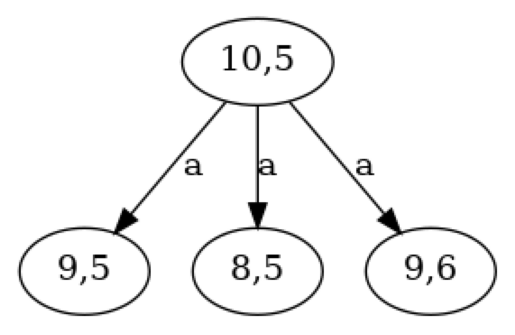

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Open the image file
image_path = 'mdp.png'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove the axis
plt.show()
#os.remove(image_path)